In [1]:
import pandas as pd

In [5]:
excel_file_path = r'C:\Users\saisu\Downloads\uber_rides_data.xlsx'

df = pd.read_excel(excel_file_path)

In [6]:
df

,ride_id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...
199995,42598914,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [7]:
#How many integer columns(by default) are given in the dataset?

column_data_types = df.dtypes
integer_columns = column_data_types[column_data_types == 'int64']
num_integer_columns = len(integer_columns)

print(f"Number of integer columns in the dataset: {num_integer_columns}")

Number of integer columns in the dataset: 2


In [8]:
#What is the shape of given dataset?

shape = df.shape
print(shape)

(200000, 8)


In [9]:
#How many missing values exists in 'dropoff_longitude' column?
missing_values = df['dropoff_longitude'].isna().sum()
print("Number of missing values in 'dropoff_longitude' column:", missing_values)

Number of missing values in 'dropoff_longitude' column: 1


In [10]:
#What is the data type of ' pickup_datetime' feature in your data?
data_type = df['pickup_datetime'].dtype
print("Data type of 'pickup_datetime' feature:", data_type)

Data type of 'pickup_datetime' feature: object


In [11]:
#Which of the following is the correct syntax to convert 'pickup_datetime' to datetime datatype?

#pd.to_datetime(df['pickup_datetime'])

In [12]:
#Which function can be used to remove null values from the dataframe?
#df.dropna()

In [13]:
#What is the average fare amount? Remove the null values from the dataframe to answer the following question.
df = df.dropna()


average_fare = df['fare_amount'].mean()

print("Average Fare Amount:", average_fare)

Average Fare Amount: 11.359891549458371


In [15]:
#Calculate distance between each pickup and dropoff points using Haversine formula. 
#What is the median haversine distance between pickup and dropoff location according to the given dataset?
#Read about Haversine Distance here: https://en.wikipedia.org/wiki/Haversine_formula

import numpy as np


def haversine(lat1, lon1, lat2, lon2):
 
    R = 6371.0

    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)
    
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    
    return distance

df['haversine_distance'] = df.apply(lambda row: haversine(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)


median_haversine_distance = df['haversine_distance'].median()

print("Median Haversine Distance:", median_haversine_distance)


Median Haversine Distance: 2.120992396182902


C:\Users\saisu\AppData\Local\Temp\ipykernel_20640\2125694318.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['haversine_distance'] = df.apply(lambda row: haversine(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)


In [16]:
#What is the maximum haversine distance between pickup and dropoff location according to the given dataset?


max_haversine_distance = df['haversine_distance'].max()

print("Maximum Haversine Distance:", max_haversine_distance)


Maximum Haversine Distance: 16409.23913531317


In [17]:
#How many rides have 0.0 haversine distance between pickup and dropoff location according to the given dataset?


zero_distance_rides = df[df['haversine_distance'] == 0.0]
num_zero_distance_rides = len(zero_distance_rides)

print("Number of rides with 0.0 Haversine distance:", num_zero_distance_rides)


Number of rides with 0.0 Haversine distance: 5632


Mean 'fare_amount' for rides with 0.0 Haversine distance: 11.585317826704578


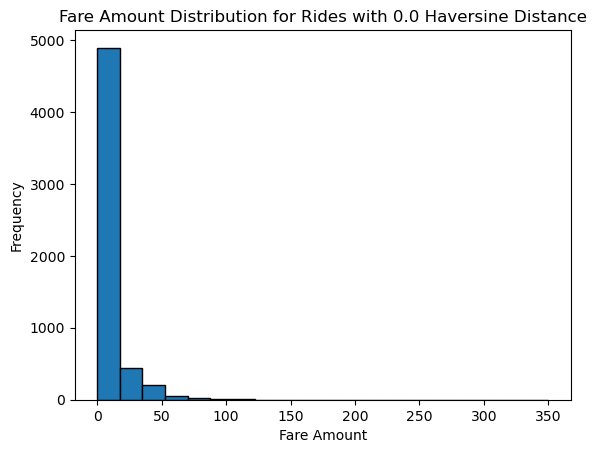

In [18]:
#What is the mean 'fare_amount' for rides with 0 haversine distance? 
#Do you sense something fishy? Try to analyze, and give your expert opinion in Jupyter Notebook.


import matplotlib.pyplot as plt


zero_distance_rides = df[df['haversine_distance'] == 0.0]


mean_fare_for_zero_distance_rides = zero_distance_rides['fare_amount'].mean()

print("Mean 'fare_amount' for rides with 0.0 Haversine distance:", mean_fare_for_zero_distance_rides)


plt.hist(zero_distance_rides['fare_amount'], bins=20, edgecolor='k')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.title('Fare Amount Distribution for Rides with 0.0 Haversine Distance')
plt.show()


In [19]:
#What is the maximum 'fare_amount' for a ride?


max_fare_amount = df['fare_amount'].max()

print("Maximum 'fare_amount' for a ride:", max_fare_amount)


Maximum 'fare_amount' for a ride: 499.0


In [20]:
#What is the haversine distance between pickup and dropoff location for the costliest ride?
#Do you sense something fishy? Try to analyze, and give your expert opinion in Jupyter Notebook.


max_fare_index = df['fare_amount'].idxmax()

pickup_lat = df.at[max_fare_index, 'pickup_latitude']
pickup_lon = df.at[max_fare_index, 'pickup_longitude']
dropoff_lat = df.at[max_fare_index, 'dropoff_latitude']
dropoff_lon = df.at[max_fare_index, 'dropoff_longitude']

# Function to calculate Haversine distance
def haversine(lat1, lon1, lat2, lon2):

    R = 6371.0
    

    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    
    return distance

haversine_distance_costliest_ride = haversine(pickup_lat, pickup_lon, dropoff_lat, dropoff_lon)

print("Haversine distance for the costliest ride:", haversine_distance_costliest_ride)


Haversine distance for the costliest ride: 0.0007899213191009994


In [23]:

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])


df['pickup_year'] = df['pickup_datetime'].dt.year


rides_in_2014 = df[df['pickup_year'] == 2014]


num_rides_in_2014 = len(rides_in_2014)

print("Number of rides recorded in the year 2014:", num_rides_in_2014)


Number of rides recorded in the year 2014: 29968


C:\Users\saisu\AppData\Local\Temp\ipykernel_20640\2028509208.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
C:\Users\saisu\AppData\Local\Temp\ipykernel_20640\2028509208.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_year'] = df['pickup_datetime'].dt.year


In [24]:
#How many rides were recorded in the first quarter of 2014?


df['pickup_quarter'] = df['pickup_datetime'].dt.quarter


rides_in_first_quarter_2014 = df[(df['pickup_year'] == 2014) & (df['pickup_quarter'] == 1)]


num_rides_in_first_quarter_2014 = len(rides_in_first_quarter_2014)

print("Number of rides recorded in the first quarter of 2014:", num_rides_in_first_quarter_2014)


Number of rides recorded in the first quarter of 2014: 7687


C:\Users\saisu\AppData\Local\Temp\ipykernel_20640\314265249.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_quarter'] = df['pickup_datetime'].dt.quarter


In [25]:
#On which day of the week in September 2010, maximum rides were recorded ?

rides_in_september_2010 = df[(df['pickup_datetime'].dt.year == 2010) & (df['pickup_datetime'].dt.month == 9)]


rides_in_september_2010['pickup_day_of_week'] = rides_in_september_2010['pickup_datetime'].dt.day_name()


max_rides_day = rides_in_september_2010['pickup_day_of_week'].value_counts().idxmax()

print("Day of the week in September 2010 with maximum rides:", max_rides_day)


Day of the week in September 2010 with maximum rides: Thursday


C:\Users\saisu\AppData\Local\Temp\ipykernel_20640\1079425012.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rides_in_september_2010['pickup_day_of_week'] = rides_in_september_2010['pickup_datetime'].dt.day_name()
